# Siamese LSTM (w/o attention)

## 1. Read the input 

In [1]:
import argparse
from time import time
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, LSTM, Dense, Subtract, Activation, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
#suturing
n_timesteps =  355
n_features = 76

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-u", "--hidden", required=True,
   help="hidden unit count")
ap.add_argument("-e", "--epoch", required=True,
   help="epoch count")
ap.add_argument("-m", "--model", required=True,
   help="path to output trained model")
ap.add_argument("-p", "--plot", required=True,
   help="path to output accuracy/loss plot")
ap.add_argument("-pr", "--pred", required=True,
   help="path for prediction results")
ap.add_argument("-s", "--sur", required=True,
   help="surgery type")
ap.add_argument("-i", "--inputfolder", required=True,
   help="path to input folder")
ap.add_argument("-cv", "--foldcount", required=True,
   help="cross validation count")

args = vars(ap.parse_args())
print(args)

In [3]:
# File paths
inputfolder = './folds/4/'
surgeryType = 'ST_sax_btc2_hn64_e75'
foldcount = 4
py_output_folder = './py_dd_bidirection_sax_cpu/' + surgeryType + '/folds/' + str(foldcount)

# Model variables,
n_hidden = 64
n_epoch = 10
batch_size = 2

print(os.path.isdir(py_output_folder))
if not os.path.isdir(py_output_folder):
    os.makedirs(py_output_folder)

if not os.path.isdir(py_output_folder + '/models/'):
    os.makedirs(py_output_folder + '/models/')

if not os.path.isdir(py_output_folder + '/csvs/'):
    os.makedirs(py_output_folder + '/csvs/')

if not os.path.isdir(py_output_folder + '/figs/'):
    os.makedirs(py_output_folder + '/figs/')

False


## 2. Creating the base Network and Evaluation 

train finished
test finished
val finished
X_train_l shape (297, 26980) X_train_r shape (297, 26980)
X_validation_l shape (109, 26980) X_validation_r shape (109, 26980)
Y_train shape (297, 1) Y_validation shape (109, 1)
reshaped matrices
X_train_l shape (297, 355, 76) X_train_r shape (297, 355, 76)
X_validation_l shape (109, 355, 76) X_validation_r shape (109, 355, 76)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 355, 76)]            0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 355, 76)]            0         []                            
                                                                                                  
 sequential (Sequent

/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 5s 36ms/step - loss: 0.3024 - accuracy: 0.8687 - val_loss: 0.3514 - val_accuracy: 0.8073
Epoch 3/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2773 - accuracy: 0.8620 - val_loss: 0.2874 - val_accuracy: 0.8349
Epoch 4/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2378 - accuracy: 0.8889 - val_loss: 0.2704 - val_accuracy: 0.8716
Epoch 5/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2123 - accuracy: 0.8956 - val_loss: 0.2326 - val_accuracy: 0.8807
Epoch 6/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2020 - accuracy: 0.8923 - val_loss: 0.2484 - val_accuracy: 0.8624
Epoch 7/10
149/149 [==============================] - 5s 36ms/step - loss: 0.1826 - accuracy: 0.9057 - val_loss: 0.2248 - val_accuracy: 0.8716
Epoch 8/10
149/149 [==============================] - 5s 36ms/step - loss: 0.1804 - accuracy: 0.9024 - val_loss: 0.2036 - val_accuracy: 0.8716
Epoch 9/10

/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 5s 36ms/step - loss: 0.3251 - accuracy: 0.8485 - val_loss: 0.3416 - val_accuracy: 0.8257
Epoch 3/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2543 - accuracy: 0.8721 - val_loss: 0.3314 - val_accuracy: 0.8165
Epoch 4/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2279 - accuracy: 0.9125 - val_loss: 0.3149 - val_accuracy: 0.8165
Epoch 5/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2123 - accuracy: 0.9057 - val_loss: 0.2719 - val_accuracy: 0.8532
Epoch 6/10
149/149 [==============================] - 5s 37ms/step - loss: 0.1954 - accuracy: 0.9057 - val_loss: 0.2379 - val_accuracy: 0.8624
Epoch 7/10
149/149 [==============================] - 6s 41ms/step - loss: 0.1852 - accuracy: 0.9192 - val_loss: 0.2440 - val_accuracy: 0.8532
Epoch 8/10
149/149 [==============================] - 6s 40ms/step - loss: 0.1705 - accuracy: 0.9327 - val_loss: 0.2201 - val_accuracy: 0.8624
Epoch 9/10

/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 5s 36ms/step - loss: 0.3502 - accuracy: 0.8283 - val_loss: 0.3335 - val_accuracy: 0.8349
Epoch 3/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2749 - accuracy: 0.8620 - val_loss: 0.3077 - val_accuracy: 0.8165
Epoch 4/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2636 - accuracy: 0.8552 - val_loss: 0.2946 - val_accuracy: 0.8349
Epoch 5/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2071 - accuracy: 0.8990 - val_loss: 0.2886 - val_accuracy: 0.8349
Epoch 6/10
149/149 [==============================] - 5s 36ms/step - loss: 0.2133 - accuracy: 0.8923 - val_loss: 0.2660 - val_accuracy: 0.8532
Epoch 7/10
149/149 [==============================] - 5s 36ms/step - loss: 0.1923 - accuracy: 0.8923 - val_loss: 0.2002 - val_accuracy: 0.8991
Epoch 8/10
149/149 [==============================] - 5s 36ms/step - loss: 0.1742 - accuracy: 0.9024 - val_loss: 0.1723 - val_accuracy: 0.9174
Epoch 9/10

/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


159/159 [==============================] - 4s 28ms/step - loss: 0.3186 - accuracy: 0.8648 - val_loss: 0.3642 - val_accuracy: 0.8034
Epoch 3/10
159/159 [==============================] - 5s 28ms/step - loss: 0.2631 - accuracy: 0.8994 - val_loss: 0.3570 - val_accuracy: 0.8034
Epoch 4/10
159/159 [==============================] - 4s 28ms/step - loss: 0.2494 - accuracy: 0.8994 - val_loss: 0.3088 - val_accuracy: 0.8376
Epoch 5/10
159/159 [==============================] - 4s 28ms/step - loss: 0.2040 - accuracy: 0.9182 - val_loss: 0.2855 - val_accuracy: 0.8205
Epoch 6/10
159/159 [==============================] - 4s 28ms/step - loss: 0.1927 - accuracy: 0.9088 - val_loss: 0.2981 - val_accuracy: 0.8376
Epoch 7/10
159/159 [==============================] - 4s 28ms/step - loss: 0.1897 - accuracy: 0.9088 - val_loss: 0.2488 - val_accuracy: 0.8547
Epoch 8/10
159/159 [==============================] - 4s 28ms/step - loss: 0.1623 - accuracy: 0.9245 - val_loss: 0.2751 - val_accuracy: 0.8547
Epoch 9/10

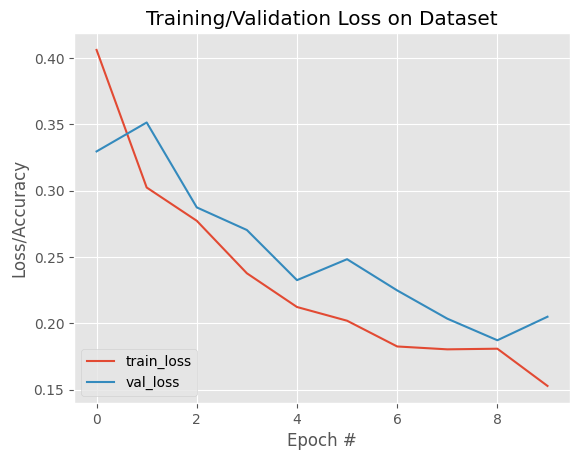

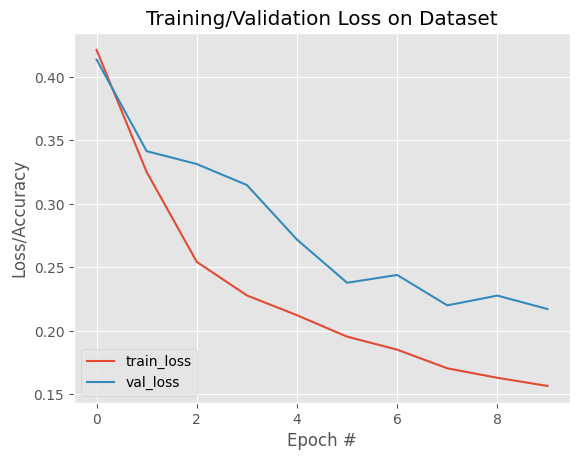

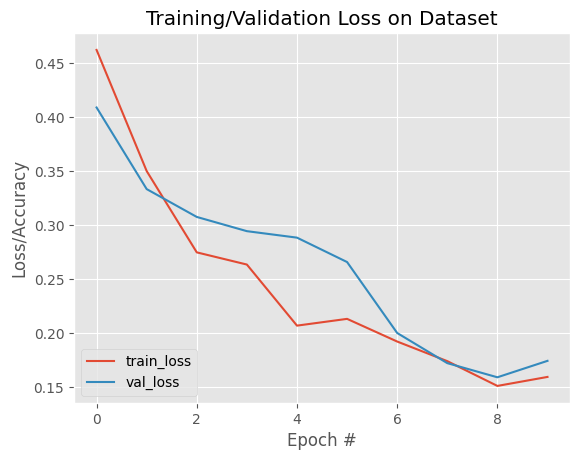

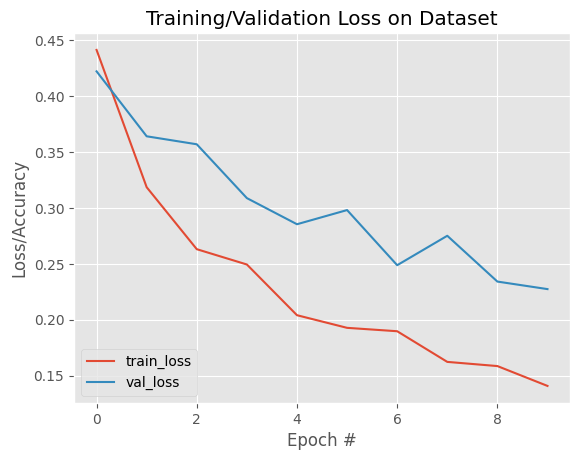

In [5]:
def create_base_network(input_dim):
    '''Base network to be shared (eq. to feature extraction).
    '''

    seq = Sequential()
    #seq.add(LSTM(n_hidden, input_shape=(input_dim,), activation='relu'))
    #seq.add(LSTM(n_hidden))
    #seq.add(Bidirectional(LSTM(n_hidden, dropout=0.17, recurrent_dropout= 0.17)))
    seq.add(Bidirectional(LSTM(n_hidden)))
    #seq.add(Bidirectional(LSTM(n_hidden)))
    seq.add(Dense(1))
    #seq.add(Activation('sigmoid'))
    return seq
    
for x in range(1, foldcount + 1):
    TRAIN_L_csv = inputfolder + str(x) + '_train_l.csv'
    TRAIN_R_csv = inputfolder + str(x) + '_train_r.csv'
    SCORES_T_csv = inputfolder + str(x) + '_train_s.csv'

    TEST_L_csv = inputfolder + str(x) + '_test_l.csv'
    TEST_R_csv = inputfolder + str(x) + '_test_r.csv'
    SCORES_TEST_csv = inputfolder + str(x) + '_test_s.csv'

    VAL_L_csv = inputfolder + str(x) + '_val_l.csv'
    VAL_R_csv = inputfolder + str(x) + '_val_r.csv'
    SCORES_V_csv = inputfolder + str(x) + '_val_s.csv'

    X_train_l = pd.read_csv(TRAIN_L_csv)
    X_train_r = pd.read_csv(TRAIN_R_csv)
    Y_train = pd.read_csv(SCORES_T_csv)
    print("train finished")

    X_test_l = pd.read_csv(TEST_L_csv)
    X_test_r = pd.read_csv(TEST_R_csv)
    Y_test = pd.read_csv(SCORES_TEST_csv)
    print("test finished")

    X_validation_l = pd.read_csv(VAL_L_csv)
    X_validation_r = pd.read_csv(VAL_R_csv)
    Y_validation = pd.read_csv(SCORES_V_csv)
    print("val finished")

    X_train_l = X_train_l.values
    X_train_r = X_train_r.values
    Y_train = Y_train.values

    X_test_l = X_test_l.values
    X_test_r = X_test_r.values
    Y_test = Y_test.values

    X_validation_l = X_validation_l.values
    X_validation_r = X_validation_r.values
    Y_validation = Y_validation.values

    print("X_train_l shape", X_train_l.shape, "X_train_r shape", X_train_r.shape)
    print("X_validation_l shape", X_validation_l.shape, "X_validation_r shape", X_validation_r.shape)
    print("Y_train shape", Y_train.shape, "Y_validation shape", Y_validation.shape)

    # reshape input to be 3D [samples, timesteps, features]
    X_train_l = X_train_l.reshape((X_train_l.shape[0], n_timesteps, n_features))
    X_train_r = X_train_r.reshape((X_train_r.shape[0], n_timesteps, n_features))

    X_test_l = X_test_l.reshape((X_test_l.shape[0], n_timesteps, n_features))
    X_test_r = X_test_r.reshape((X_test_r.shape[0], n_timesteps, n_features))

    X_validation_l = X_validation_l.reshape((X_validation_l.shape[0], n_timesteps, n_features))
    X_validation_r = X_validation_r.reshape((X_validation_r.shape[0], n_timesteps, n_features))

    print("reshaped matrices")
    print("X_train_l shape", X_train_l.shape, "X_train_r shape", X_train_r.shape)
    print("X_validation_l shape", X_validation_l.shape, "X_validation_r shape", X_validation_r.shape)

    left_input = Input(shape=(n_timesteps, n_features), dtype='float32')
    right_input = Input(shape=(n_timesteps, n_features), dtype='float32')

    # Since this is a siamese network, both sides share the same LSTM
    shared_lstm = create_base_network(n_hidden)

    left_output = shared_lstm(left_input)
    right_output = shared_lstm(right_input)

    diff = Subtract()([left_output, right_output])
    # Pass difference through sigmoid function.
    #prob = Dense(1, activation='sigmoid')(diff)
    prob = Activation("sigmoid")(diff)

    # Pack it all up into a modelalc
    model = Model([left_input, right_input], [prob])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    print(model.summary())

    # Start training
    training_start_time = time()
    #fp = py_output_folder + '/models/' + str(x) + '_' + args["model"] + '.hdf5'
    fp = py_output_folder + '/models/' + str(x) + '_' + 'e75_h64' + '.hdf5'

    checkpoint = ModelCheckpoint(fp, monitor='val_loss', save_best_only=True, mode='min')
    callbacks_list = [checkpoint]

    model_trained = model.fit([X_train_l, X_train_r], Y_train, batch_size=batch_size, epochs=n_epoch, callbacks=callbacks_list,
                                validation_data=([X_validation_l, X_validation_r], Y_validation))

    print("Training time finished.\n{} epochs in {}".format(n_epoch,
                                                            datetime.timedelta(seconds=time() - training_start_time)))
    #model.save(py_output_folder + '/models/' + str(x) + '_' + args["model"] + '.h5')
    # make a prediction
    # model = load_model('../models/LSTM_PD.h5')
    model.load_weights(fp)
    predicted = model.predict([X_test_l, X_test_r])
    #print("predicted: ", predicted, "actual: ", Y_test)
    rmse = np.sqrt(((predicted - Y_test) ** 2).mean(axis=0))
    print("Results: %.2f (%.2f) MSE", rmse)

    # threshold data
    allv = predicted.copy()
    for t in range(len(allv)):
        if allv[t] < 0.49:
            allv[t] = 0
        elif allv[t] > 0.51:
            allv[t] = 1
        else:
            allv[t] = 0.5

    # 1. sutun:  prediction_results
    # 2. sutun:  gercek degerler
    # 3. sutun:  thresholded values
    # 4. sutun:  2 ve 3 kesisimi
    # 5. sutun:  acc degeri
    # 6. sutun:  rmse degeri

    prediction_results = np.concatenate((predicted, Y_test, allv, allv, allv, allv), axis=1)
    for p in range(len(prediction_results)):
        if (prediction_results[p, 1] == prediction_results[p, 2]):
            prediction_results[p, 3] = 1
        else:
            prediction_results[p, 3] = 0
    aa = np.sum(prediction_results, axis=0)
    prediction_results[:, 4] = aa[3] / len(prediction_results)
    prediction_results[:, 5] = rmse
    # prediction_results = np.concatenate((predicted, Y_test), axis=1)
    
    #sp = py_output_folder + '/csvs/' + str(x) + args["pred"] + '.csv'
    sp = py_output_folder + '/csvs/' + str(x) + 'prede75_h64' + '.csv'
    pd.DataFrame(prediction_results).to_csv(sp)

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), model_trained.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), model_trained.history["val_loss"], label="val_loss")
    plt.title("Training/Validation Loss on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(py_output_folder + '/figs/' + str(x) + 'loses_e75_h64' + '.png')
    #plt.show()

    print("End of fold:" + str(x))
